# AI Community @ Семинар  №2
## Пример использования numpy 

Numpy - библиотека для Python, позволяющая совершать операции с многомерными матрицами (тензорами) эффективно и удобно

# Базовая алгебра в numpy

In [1]:
import numpy as np
from scipy import linalg

In [3]:
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([3, 5])
print('A:\n{}, \nb:\n{}'.format(A, b))

A:
[[1 2]
 [3 4]
 [5 6]], 
b:
[3 5]


In [24]:
print('Размер A:{}, размер b:{}'.format(A.shape, b.shape))

Размер A:(3, 2), размер b:(2,)


## Умножение матрицы на вектор

In [5]:
c = A.dot(b)
print('c:\n{}'.format(c))

c:
[13 29 45]


In [29]:
B = np.array([[1, 7], [4, 9]])

## Умножение матрицы на матрицу

In [30]:
C = A.dot(B)
print('C:\n{}'.format(C))

C:
[[ 9 25]
 [19 57]
 [29 89]]


## Поэлементное перемножение двух матриц

In [31]:
A * C

array([[  9,  50],
       [ 57, 228],
       [145, 534]])

## Транспонирование

In [32]:
C

array([[ 9, 25],
       [19, 57],
       [29, 89]])

In [33]:
C.T

array([[ 9, 19, 29],
       [25, 57, 89]])

## Обратная матрица
#### Обратная матрица определена только для квадратных матриц
#### Мы поговорим про это на следующих занятиях

In [34]:
linalg.inv(B)

array([[-0.47368421,  0.36842105],
       [ 0.21052632, -0.05263158]])

## Эксперимент с производительностью вычислений

In [38]:
np.random.seed(23)
np.random.random(size=(5, 5))

array([[  5.17297884e-01,   9.46962604e-01,   7.65459759e-01,
          2.82395844e-01,   2.21045363e-01],
       [  6.86222085e-01,   1.67139203e-01,   3.92442466e-01,
          6.18052347e-01,   4.11930095e-01],
       [  2.46488120e-03,   8.84032182e-01,   8.84947538e-01,
          3.00409689e-01,   5.89581865e-01],
       [  9.78426916e-01,   8.45093822e-01,   6.50754391e-02,
          2.94744465e-01,   2.87934441e-01],
       [  8.22466339e-01,   6.26183038e-01,   1.10477714e-01,
          5.28811169e-04,   9.42166233e-01]])

Создание двух больших матриц с помощью numpy

In [39]:
M, N, K = 200, 100, 400

In [14]:
Big_A = np.random.random(size=(M, N))
Big_B = np.random.random(size=(N, K))

In [40]:
import time

Проверим время перемножения двух больших матриц с помощью numpy

In [59]:
start_time = time.time()
C_Big = Big_A.dot(Big_B)
numpy_calc_time = time.time() - start_time
print('Numpy multiplication time: {}'.format(numpy_calc_time))

Numpy multiplication time: 0.001277923583984375


In [60]:
import random as rnd

Напишем свои простейшие реализации создания и перемножения двух матриц

In [61]:
def create_random_matrix(shape):
    A = []
    for i in range(shape[0]):
        A_row = [rnd.random() for _ in range(shape[1])]
        A.append(A_row)
    return A

In [62]:
My_Big_A = create_random_matrix(shape=(M, N))
My_Big_B = create_random_matrix(shape=(N, K))

In [63]:
def multiply_matrices(A, B):
    m, n, k = len(A), len(A[0]), len(B[0])
    
    C = []
    for i in range(m):
        row_sum = 0.
        C.append([])
        for j in range(k):
            for p in range(n):
                row_sum += A[i][p] * B[p][j]
            C[i].append(row_sum)
    
    return C

Замерим время перемножения матриц нашим алгоритмом

In [65]:
start_time = time.time()
My_Big_C = multiply_matrices(My_Big_A, My_Big_B)
my_calc_time = time.time() - start_time
print('My multiplication time: {}'.format(my_calc_time))

My multiplication time: 1.3472707271575928


Сравним время работы

In [66]:
print('Speed up: {}'.format(my_calc_time / numpy_calc_time))

Speed up: 1054.265485074627


Мы потратили 20 минут на собственную реализацию, которая при том еще и работает в тысячу с лишним раз медленнее, чем реализация `numpy`. Теперь вы понимаете, как вам может пригодиться `numpy` в реальных задачах.

## Создание матриц

#### Матрица из единиц размером 2х3

In [67]:
np.ones((2, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

#### Матрица из нулей размером 2х3

In [72]:
np.zeros(shape=(2, 3, 2))

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

#### Единичная матрица размера 5x5

In [145]:
a = np.eye(5, 5)
a

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

#### Можно задавать тип элементов внутри матрицы

In [78]:
a = np.eye(5, 5, dtype='int')
a

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [79]:
np.ones_like(a)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

### Индексация и срезы

In [2]:
from skimage.io import imread, imshow, imshow_collection

from pylab import rcParams
%matplotlib inline

Изображение представляется той же матрицей, или ее обобщением, называемым тензором. Для более ясного преставления дальнеших операций, будем работать с изображениями.

In [3]:
img = imread('data/lemur.jpg')

In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape

(1184, 1920, 3)

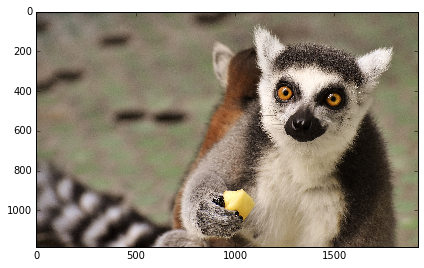

In [6]:
imshow(img)

#### Выполняем различные срезы по изображению

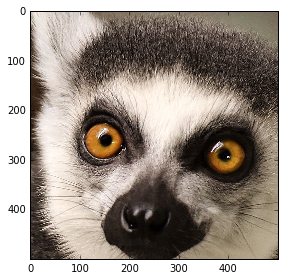

In [90]:
imshow(img[150:650, 1100:1600, :])

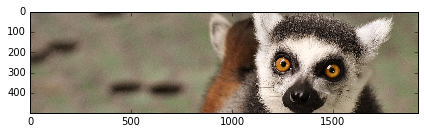

In [91]:
imshow(img[150:650, :])

#### Посмотрим на цветовые компоненты изображения (RGB)

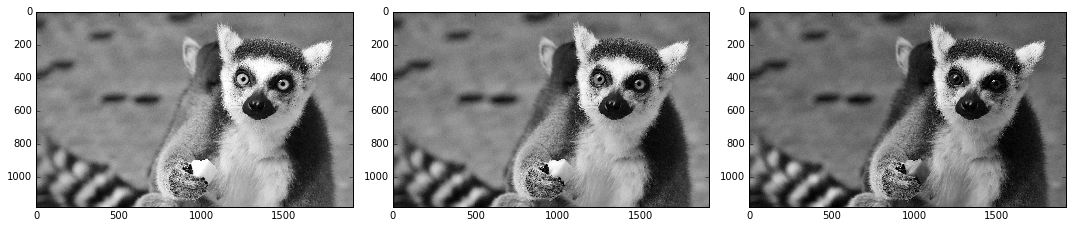

In [6]:
rcParams['figure.figsize'] = (15, 15)
imshow_collection([img[:, :, 0], img[:, :, 1], img[:, :, -1]])
rcParams['figure.figsize'] = (7, 10)

#### Применение масок к изображению

In [10]:
white_mask.shape

(1184, 1920, 3)

/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


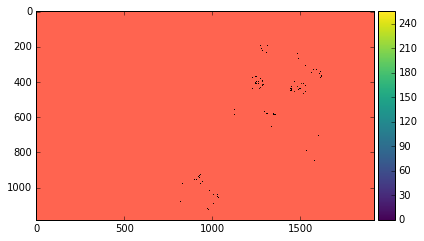

In [14]:
dst = img.copy()

white_mask = img > 0
# white_mask = ~white_mask
white_mask = white_mask.all(axis=2)

dst[white_mask] = [255, 100, 80]
imshow(dst);

In [105]:
from skimage import draw

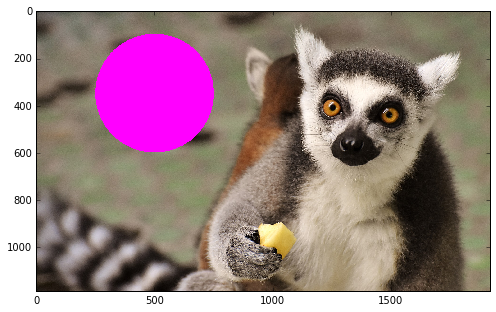

In [106]:
dst = img.copy()
rr, cc = draw.circle(r=350, c=500, radius=250)
dst[rr, cc] = [255, 0, 255] 
imshow(dst)

### Еще немного numpy

#### Создадим вектор из 16 элементов [0; 16)

In [108]:
a = np.arange(16)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

#### Поменяем его shape

In [111]:
b = a.reshape((4, 4))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

#### Выпрямим его обратно

In [114]:
b.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

#### Можем сохранять и загружать матрицы numpy

In [116]:
np.save('data/lemur_processed', dst)

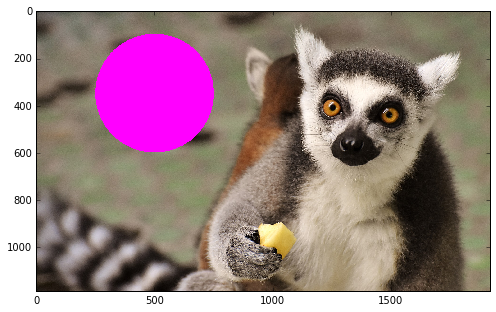

In [117]:
lemur_loaded = np.load('lemur_processed.npy')
imshow(lemur_loaded)